In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


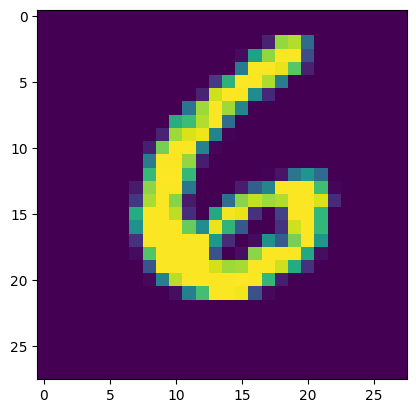

In [14]:
plt.imshow(x_train[90])

6131

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train[7].shape

(28, 28, 1)

In [7]:
num_classes = len(set(y_train))
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(num_classes)

10


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 10

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
#Train the model
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10


2024-01-20 11:47:10.259236: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 7s 8ms/step - loss: 0.2386 - accuracy: 0.9279 - val_loss: 0.0766 - val_accuracy: 0.9766
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0995 - accuracy: 0.9697 - val_loss: 0.0586 - val_accuracy: 0.9816
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0823 - accuracy: 0.9754 - val_loss: 0.0469 - val_accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0717 - accuracy: 0.9789 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0638 - accuracy: 0.9817 - val_loss: 0.0533 - val_accuracy: 0.9870
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0592 - accuracy: 0.9826 - val_loss: 0.0538 - val_accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0481 - val_accuracy: 0.9892
Epoch 8/10
469/46

In [14]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
#Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05919366329908371
Test accuracy: 0.989300012588501
